# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from thermolib.thermodynamics.fep import FreeEnergySurface2D, plot_feps
from thermolib.thermodynamics.histogram import Histogram2D
from thermolib.tools import read_wham_input_2D

import numpy as np, matplotlib.pyplot as pp

from molmod.units import *

# Example Elias 1

CV grid specification
---------------------
CV1 grid [au]: start = 5.021e-01    end = 1.498e+00    delta = 4.167e-03    N = 240
CV2 grid [au]: start = 2.083e-03    end = 9.979e-01    delta = 4.167e-03    N = 240


/home/louis/miniconda3/lib/python3.8/site-packages/thermolib/thermodynamics/fep.py:1366: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = pp.colorbar(contourf, extend='both')


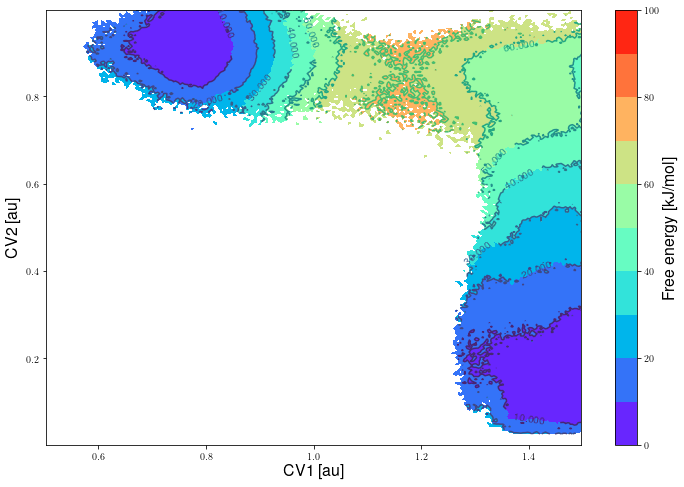

In [3]:
fn_fes_ext = '/home/louis/hpc/data/shared/Elias/Elias-Louis/Umbrella_2D/ODealkylation/freefile_no18'
temp = 523*kelvin
fes_ext = FreeEnergySurface2D.from_txt(fn_fes_ext, temp, delimiter='\t', verbose=True)
fes_ext.plot('fes_elias1_ext.png', ncolors=10, lims=[0,100])

In [4]:
#read temperature and bias potentials from wham_input.txt file
fn_wham = '/home/louis/hpc/data/shared/Elias/Elias-Louis/Umbrella_2D/ODealkylation/metadatafile_no18'
temp_none, biasses, trajectories = read_wham_input_2D(fn_wham, path_template_colvar_fns='%s', stride=10, verbose=True)

Processing bias Window0/r1/COLVAR
  added Parabola2D (Window0/r1/COLVAR): K1=1000 kjmol  q01=1.400e+00 au  K2=1000 kjmol  q02=5.000e-02 au
  trajectory read from /home/louis/hpc/data/shared/Elias/Elias-Louis/Umbrella_2D/ODealkylation/Window0/r1/COLVAR

Processing bias Window1/r1/COLVAR
  added Parabola2D (Window1/r1/COLVAR): K1=1000 kjmol  q01=1.400e+00 au  K2=1000 kjmol  q02=1.000e-01 au
  trajectory read from /home/louis/hpc/data/shared/Elias/Elias-Louis/Umbrella_2D/ODealkylation/Window1/r1/COLVAR

Processing bias Window2/r1/COLVAR
  added Parabola2D (Window2/r1/COLVAR): K1=1000 kjmol  q01=1.400e+00 au  K2=1000 kjmol  q02=1.500e-01 au
  trajectory read from /home/louis/hpc/data/shared/Elias/Elias-Louis/Umbrella_2D/ODealkylation/Window2/r1/COLVAR

Processing bias Window3/r1/COLVAR
  added Parabola2D (Window3/r1/COLVAR): K1=1000 kjmol  q01=1.400e+00 au  K2=1000 kjmol  q02=2.000e-01 au
  trajectory read from /home/louis/hpc/data/shared/Elias/Elias-Louis/Umbrella_2D/ODealkylation/Window3

## Without error estimation

In [ ]:
bins = [np.arange(0.5,1.5+1/240, 1/240),np.arange(0.0,1.0+1/240,1/240)]
hist = Histogram2D.from_wham(bins, trajectories, biasses, temp, error_estimate=None, verbose=True, convergence=1e-6)

In [ ]:
fes = FreeEnergySurface2D.from_histogram(hist, temp)
fes.set_ref(ref='min')
fes.plot('fes_elias1.png', ncolors=10, lims=[0,100])

In [ ]:
fep_ext = fes_ext.project_difference()
fep_ext.set_ref(ref='min')
fep = fes.project_difference()
fep.set_ref(ref='min')
plot_feps('projected_feps.png', [fep_ext,fep], temp=523*kelvin, 
          labels=['External', 'ThermoLIB'], colors=['k','b'],linestyles=['--', '-'])

In [ ]:
fep_ext = fes_ext.project_average()
fep_ext.set_ref(ref='min')
fep = fes.project_average()
fep.set_ref(ref='min')
plot_feps('projected_feps.png', [fep_ext,fep], temp=523*kelvin, 
          labels=['External', 'ThermoLIB'], colors=['k','b'],linestyles=['--', '-'])

## With error estimation

In [5]:
bins = [np.arange(0.5,1.5+1/240, 1/240),np.arange(0.0,1.0+1/240,1/240)]
hist = Histogram2D.from_wham(bins, trajectories, biasses, temp, error_estimate='None', verbose=True, convergence=1e-6)

Initialization
--------------
processing trajectories ...
processing bins ...
generating individual histograms for each biased simulation ...
computing bias on grid ...

WHAM setup
----------
Number of simulations =  34
    simulation 0 has 2423 steps
    simulation 1 has 2519 steps
    simulation 2 has 2561 steps
    simulation 3 has 1841 steps
    simulation 4 has 2032 steps
    simulation 5 has 2372 steps
    simulation 6 has 1859 steps
    simulation 7 has 2285 steps
    simulation 8 has 1917 steps
    simulation 9 has 2180 steps
    simulation 10 has 2553 steps
    simulation 11 has 2468 steps
    simulation 12 has 2572 steps
    simulation 13 has 2382 steps
    simulation 14 has 2453 steps
    simulation 15 has 2196 steps
    simulation 16 has 2320 steps
    simulation 17 has 1894 steps
    simulation 18 has 2311 steps
    simulation 19 has 2382 steps
    simulation 20 has 2529 steps
    simulation 21 has 2559 steps
    simulation 22 has 2523 steps
    simulation 23 has 2523 step

OSError: Recieved invalid argument for method, recieved None. Check routine signiture for more information on allowed values.

In [ ]:
hist_p = Histogram2D.from_wham(bins, trajectories, biasses, temp, pinit=hist.ps, error_estimate='mle_f', verbose=True, convergence=1e-6)

In [ ]:
fes_f = FreeEnergySurface2D.from_histogram(hist_f, temp)
fes_f.set_ref(ref='min')
fes_f.plot('fes_elias1.png', ncolors=10, lims=[0,100])

In [ ]:
fes_err = FreeEnergySurface2D(fes_f.cv1s.copy(), fes_f.cv2s.copy(), fes_f.fupper-fes_f.flower, fes_f.T)
fes_err.plot('fes_elias1_err.png', ncolors=10, lims=[0,20])

# Example Massimo

In [ ]:
fn_fes_ext = '/home/louis/hpc/data/shared/massimo/for_Louis/2D_umbrella/fes_wham.dat'
temp = 573*kelvin
fes_ext = FreeEnergySurface2D.from_txt(fn_fes_ext, temp, delimiter='\t', verbose=True)
fes_ext.plot('fes_ext.png', ncolors=14, lims=[0,140])

In [ ]:
#read temperature and bias potentials from wham_input.txt file
fn_wham = '/home/louis/hpc/data/shared/massimo/for_Louis/2D_umbrella/wham_input_bis.txt'
temp_none, biasses, trajectories = read_wham_input_2D(fn_wham, path_template_colvar_fns='colvar_%s.dat', verbose=True)

In [ ]:
bins = [np.arange(1.305, 3.995+0.01, 0.01), np.arange(-2.495, -0.305+0.01, 0.01)]
hist = Histogram2D.from_wham(bins, trajectories, biasses, temp, error_estimate=None, verbose=True, convergence=1e-6)

In [ ]:
fes = FreeEnergySurface2D.from_histogram(hist, temp)
fes.set_ref(ref='min')
fes.plot('fes.png', ncolors=14, lims=[0,140])

# Example Elias 2

In [ ]:
fn_fes_ext = '/home/louis/hpc/data/shared/Elias/Elias-Louis/Umbrella_2D/CDealkylation/freefile_3108'
temp = 523*kelvin
fes_ext = FreeEnergySurface2D.from_txt(fn_fes_ext, temp, delimiter='\t', verbose=True)
fes_ext.plot('fes_elias2_ext.png', ncolors=12, lims=[0,120])

In [ ]:
#read temperature and bias potentials from wham_input.txt file
fn_wham = '/home/louis/hpc/data/shared/Elias/Elias-Louis/Umbrella_2D/CDealkylation/metadatafile_2D'
temp_none, biasses, trajectories = read_wham_input_2D(fn_wham, path_template_colvar_fns='%s', verbose=True)

In [ ]:
bins = [np.arange(0.0, 0.9+0.9/240, 0.9/240),np.arange(1.4,2.8+1.4/240,1.4/240)]
hist = Histogram2D.from_wham(bins, trajectories, biasses, temp, error_estimate=None, verbose=True, convergence=1e-4, plot_biases=True)

In [ ]:
fes = FreeEnergySurface2D.from_histogram(hist, temp)
fes.set_ref(ref='min')
fes.plot('fes_elias2.png', ncolors=12, lims=[0,120])

In [ ]:
pinit = hist.ps.copy()
hist2 = Histogram2D.from_wham(bins, trajectories, biasses, temp, pinit=pinit, error_estimate=None, verbose=True, convergence=1e-4)

In [ ]:
fes2 = FreeEnergySurface2D.from_histogram(hist2, temp)
fes2.set_ref(ref='min')
fes2.plot('fes_elias2_2.png', ncolors=18, lims=[0,120])

In [ ]:
fes_ext_cleaned = fes_ext.copy()
fes_ext_cleaned.detect_clusters(fn_plot='clusters.png')

In [ ]:
fes_cleaned = fes.copy()
fes_cleaned.detect_clusters(fn_plot='clusters.png')

In [ ]:
fep_ext = fes_ext_cleaned.project_cv1()
fep_ext.process_states(ts_range=[0.3,0.5])
#fep_ext.recollect(np.arange(-1.50,0.50+1/480,1/480))
fep_ext.set_ref(ref='p')
fep = fes_cleaned.project_cv1()
fep.process_states(ts_range=[0.3,0.5])
#fep.recollect(np.arange(-1.50,0.50+1/480,1/480))
fep.set_ref(ref='p')
plot_feps('projected_feps.png', [fep_ext,fep], temp=523*kelvin, 
          labels=['External', 'ThermoLIB'], colors=['k','b'],linestyles=['--', '-'], flims=[-30,120])

In [ ]:
fep_ext2 = fes_ext_cleaned.project_cv2()
fep_ext2.process_states(ts_range=[1.8,2.2])
fep_ext2.set_ref(ref='r')
fep2 = fes_cleaned.project_cv2()
fep2.process_states(ts_range=[1.8,2.2])
fep2.set_ref(ref='r')
plot_feps('projected_feps.png', [fep_ext2,fep2], temp=523*kelvin, 
          labels=['External', 'ThermoLIB'], colors=['k','b'],linestyles=['--', '-'], flims=[-30,120])